#<font color=darkblue size=20px>Multimodal AI

<font size= 6px>What is Multimodal AI?

**Multimodal AI** refers to artificial intelligence systems that can process, understand, and integrate information from multiple modalities. A modality is a specific type or channel of data, such as text, images, audio, video, or sensor data. Unlike traditional AI, which might focus on a single modality (e.g., text for chatbots or images for object detection), multimodal AI combines these different data types to create richer, more human-like understanding and responses. For example, a multimodal AI could analyze an image and its caption together to understand the context better than analyzing either alone.


#<font color=orange size=5px>AI Systems Integrate Information from Multiple Modalities

Multimodal AI systems take inputs from different modalities and combine them to make decisions or generate outputs. For example:

*   A smart assistant like Siri processes voice (audio) and context (text or app data).
*A self-driving car uses images (cameras), LiDAR (3D point clouds), and GPS (location data).\
*LiDAR ( Light Detection and Ranging ) remote sensing technology that uses laser pulses to create a 3D representation of an environment


#<font color=Green>Examples
<font color= white>1.   Example: In a virtual assistant, the AI might combine a user’s spoken query (audio) with their recent search history (text) to provide a relevant response.

2.For Students: Think of multimodal AI as a chef blending ingredients (modalities) to create a dish (output). Each ingredient adds unique flavor, and the combination is better than any single one.





#<font color=orange size=10px>Cross-Modal Learning
<font size=5px >Cross-modal learning</font> is when an AI model learns relationships between different modalities to improve performance. For instance, an AI might learn to associate images with their text descriptions, enabling it to generate captions for new images or retrieve images based on text queries.

* Advanced Term Explanation: "Cross-modal" means the AI bridges two or more modalities. For example, in image captioning, the model learns to map visual features (from an image) to textual descriptions (words), creating a shared understanding across modalities.
*	How It Works: Models like CLIP (Contrastive Language-Image Pretraining) train on pairs of images and text to learn a shared representation space, where similar concepts (e.g., a picture of a dog and the word "dog") are close together.
*	Applications :
    * Image Captioning: Generate text descriptions for images (e.g., "A dog running in a park").
    * Text-to-Image Search: Find images matching a text query (e.g., searching "sunset" to retrieve sunset photos).
*	For Students: Imagine teaching a robot to connect a picture of a cat with the word "cat" and its meow sound. Cross-modal learning helps the robot understand that all these refer to the same thing.
________________________________________


#MS COCO :
Released by Microsoft in 2015, the MS COCO dataset is a comprehensive collection crafted for tasks such as object detection, image segmentation, and captioning. Esteemed across the fields of machine learning and computer vision, this dataset finds widespread adoption among experts undertaking diverse computer vision projects. In the realm of computer vision, a foundational goal is to comprehend visual scenes, encompassing activities such as identifying present objects, precisely locating them in 2D and 3D space, ascertaining object attributes, and elucidating relationships between objects. As a result, the MS COCO dataset stands as a valuable asset for training algorithms focused on object detection and classification.


In [2]:
!pip install transformers torch Pillow
!pip install -qqq torchvision matplotlib requests
!pip install opencv-python



#Code Demonstration: Image Captioning with Hugging Face Transformers
Prerequisites:
*	Install dependencies: pip install transformers torch Pillow
*	Ensure students have Python 3.7+ and access to a GPU (optional for faster processing).
*	Other wise go for Google Colab

Why This Demo?:
*	It combines image processing (vision) and text generation (NLP), showcasing multimodal AI.
*	It’s practical and visually engaging, as students can upload their own images and see captions generated.
*	It uses a pre-trained model, so students can focus on understanding rather than training.


In [ ]:

# Install required libraries
#!pip install transformers torch Pillow requests

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
from io import BytesIO
import torch

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image_source, is_url=False):
    try:
        # Load image from URL or uploaded file
        if is_url:
            response = requests.get(image_source)
            image = Image.open(BytesIO(response.content)).convert("RGB")
        else:
            image = Image.open(image_source).convert("RGB")

        # Preprocess and generate caption
        inputs = processor(images=image, return_tensors="pt")
        with torch.no_grad():
            outputs = model.generate(**inputs, max_length=50)
        caption = processor.decode(outputs[0], skip_special_tokens=True)
        return caption
    except Exception as e:
        return f"Error: {str(e)}"

# Option 1: Upload an image in Colab
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload an image

# Use the first uploaded file
if uploaded:
    image_path = list(uploaded.keys())[0]
    print(f"Processing uploaded image: {image_path}")
    caption = generate_caption(image_path)
    print(f"Generated Caption: {caption}")
else:
    print("No image uploaded. Trying a sample URL instead.")

    # Option 2: Use a sample image from a URL
    sample_url = "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg"
    print(f"Processing sample image from URL: {sample_url}")
    caption = generate_caption(sample_url, is_url=True)
    print(f"Generated Caption: {caption}")


Saving _MG_5178.jpg to _MG_5178.jpg
Processing uploaded image: _MG_5178.jpg
Generated Caption: a man talking on a cell while walking down the street


#<font size=10 color=orange>Video Understanding
Video understanding involves processing video data, which combines visual (image frames) and temporal (motion or sequence) modalities, often with audio or text (e.g., subtitles). It’s more complex than image processing because videos are sequences of frames with dynamic information.

<font size=5>How It Works:

  * Frame Analysis: Extract features from individual frames using CNNs or vision transformers.
  *	Temporal Analysis: Use models like LSTMs or 3D CNNs to capture motion or changes over time.
  *	Multimodal Fusion: Combine video, audio, and text (if available) using attention mechanisms or transformers.

Applications:
  *	Video summarization (e.g., creating highlights for sports videos).
  *	Action recognition (e.g., identifying "running" or "dancing" in a video).
  *	Video question answering (e.g., answering "What is the person doing?" based on a clip).

For Students:
  * Imagine teaching an AI to watch a movie trailer and summarize it or answer questions about the plot. It needs to "see" the visuals, "hear" the audio, and understand the context




#<font color=orange>Basic Video Frame Extraction
For video understanding, here’s a simple snippet using OpenCV to extract frames from a video, which can be a starting point for video analysis. This is lightweight and helps students understand the visual component of video processing.


In [ ]:
#!pip install opencv-python

import cv2
from google.colab import files

# Upload a video
uploaded = files.upload()
if not uploaded:
    print("No video uploaded.")
else:
    video_path = list(uploaded.keys())[0]
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
    else:
        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            if frame_count % 10 == 0:
                cv2.imwrite(f"frame_{frame_count}.jpg", frame)
            frame_count += 1
        cap.release()
        print(f"Extracted {frame_count} frames.")

Saving Vikram movie dialogues YouTube videos.mp4 to Vikram movie dialogues YouTube videos.mp4
Extracted 301 frames.


#<font color=orange>Python Libraries used
#Transformers :
The transformers module, from the Hugging Face library, is used in the Multimodal AI examples (e.g., the image captioning code) to provide pre-trained models and tools for processing multiple modalities, such as images and text.

* Use: Load the BLIP model — a powerful image captioning model.

#IO Library in python:
The io module, part of Python’s standard library, is used in the Flask code to handle in-memory data streams, specifically for processing uploaded image files without saving them to disk. It’s critical for the image recognition service’s efficiency and aligns with your case study on a scalable image recognition service.

#Flask Purpose:
Web framework to create the API server.

#Torch vision Purpose:
Provides pre-trained models like ResNet50 and image transforms.

#OpenCV (Computer Vision)
Use: To read, display, and process images and videos.

#Matplotlib (Visualization)
Use: To display images or graphs in notebooks.

#Pillow (Image Processing)
Use: To open and convert image files in Python.

#PyTorch (Machine Learning)
Use: To run models, use tensors, and perform deep learning operations.

* ( torch) Deep learning framework for running the ResNet50 model

* Load model to GPU: model.to("cuda")

* Convert data to tensors

* Disable gradients using with torch.no_grad()

* Required to run the BlipForConditionalGeneration model.

#<font color=orange>Code to Preview the Frames Extracted

Saving Those vocals 🤯 Anyone else can’t stop playing Benson Boone’s new single ‘Beautiful Things’ 🔥.mp4 to Those vocals 🤯 Anyone else can’t stop playing Benson Boone’s new single ‘Beautiful Things’ 🔥.mp4


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Extracted 619 frames. Saved 62 frames.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

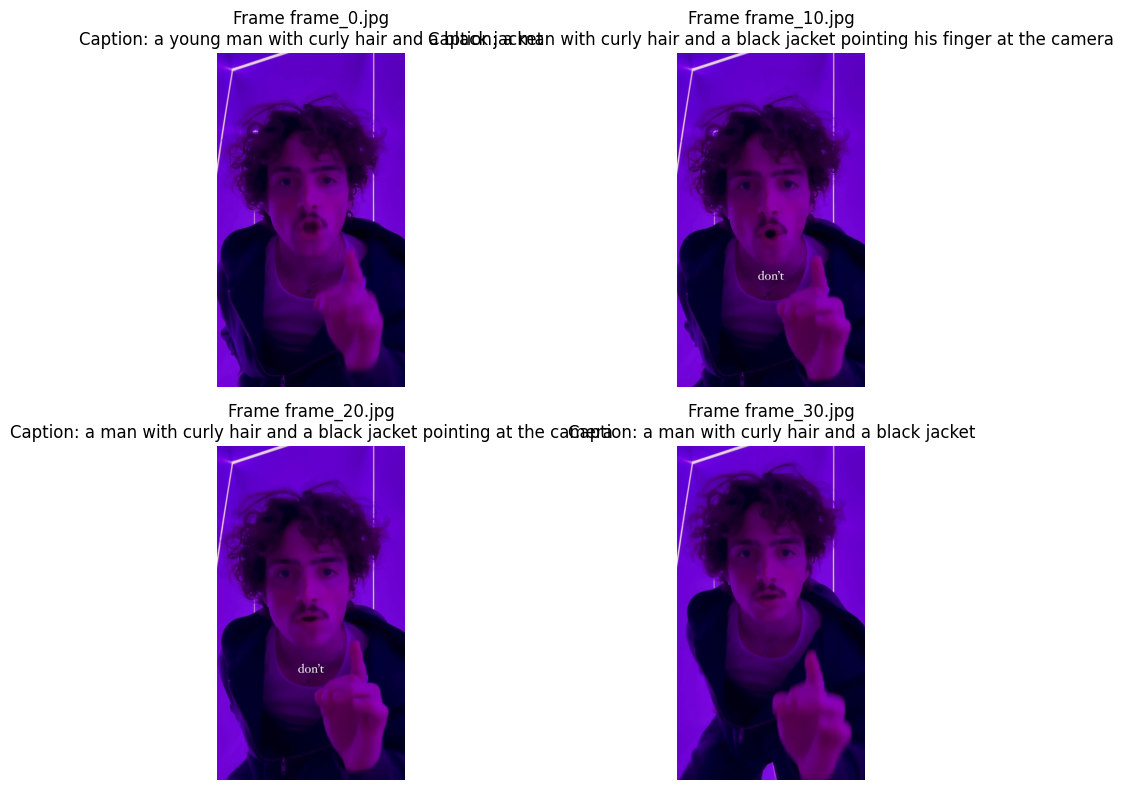

In [3]:

# Install required libraries
#!pip install opencv-python matplotlib transformers torch Pillow requests


import cv2
import matplotlib.pyplot as plt
from google.colab import files
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import os

# Function to generate caption for an image (for Multimodal AI demo)
def generate_caption(image_path):
    try:
        processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
        model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
        image = Image.open(image_path).convert("RGB")
        inputs = processor(images=image, return_tensors="pt")
        with torch.no_grad():
            outputs = model.generate(**inputs, max_length=50)
        caption = processor.decode(outputs[0], skip_special_tokens=True)
        return caption
    except Exception as e:
        return f"Error generating caption: {str(e)}"

# Upload a video
uploaded = files.upload()
if not uploaded:
    print("No video uploaded.")
else:
    video_path = list(uploaded.keys())[0]
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
    else:
        frame_count = 0
        saved_frames = []
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            if frame_count % 10 == 0:
                frame_path = f"frame_{frame_count}.jpg"
                cv2.imwrite(frame_path, frame)
                saved_frames.append(frame_path)
            frame_count += 1
        cap.release()
        print(f"Extracted {frame_count} frames. Saved {len(saved_frames)} frames.")

        # Display up to 4 saved frames with captions
        plt.figure(figsize=(12, 8))
        for i, frame_path in enumerate(saved_frames[:4]):  # Limit to 4 for display
            if os.path.exists(frame_path):
                # Read and convert frame for display (OpenCV uses BGR, Matplotlib needs RGB)
                frame = cv2.imread(frame_path)
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Generate caption for the frame
                caption = generate_caption(frame_path)

                # Plot frame with caption
                plt.subplot(2, 2, i + 1)
                plt.imshow(frame_rgb)
                plt.title(f"Frame {frame_path}\nCaption: {caption}")
                plt.axis("off")
            else:
                print(f"Frame {frame_path} not found.")
        plt.tight_layout()
        plt.show()
